# Introduction

The timeseries module provides the TimeSeries class which deals with all 1D timeseries (sizedistribution timeseries are considered 2D timeseries and are delt with in a different place). Usually when reading in any type of data, that is in some way a time series it will end up beeing a TimeSeries instance. Data in a TimeSeries is stored at TimeSeries.data in form of a pandas DataFrame instance.

# Imports

In [1]:
from atmPy.general import timeseries
from atmPy.aerosols.instruments.POPS import housekeeping
from atmPy.aerosols.instruments.piccolo import piccolo
from atmPy.data_archives.arm import read_data

In [2]:
# %matplotlib nbagg
%matplotlib inline

In [3]:
fname = '/Users/htelg/tmp/ts.csv'
st = timeseries.load_csv(fname)
st._data_period = 60

In [4]:
st_gl = st.close_gaps()

found 9 gaps


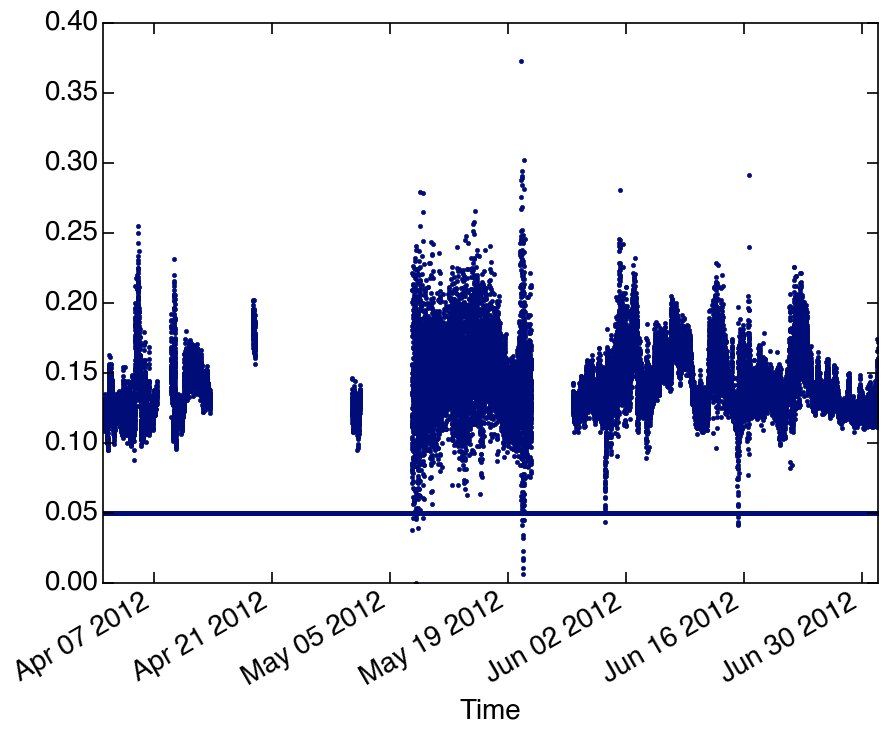

In [5]:
st_gl.data[np.isnan(st_gl.data)] = 0.05
st_gl.plot(marker = '.', linestyle = '')

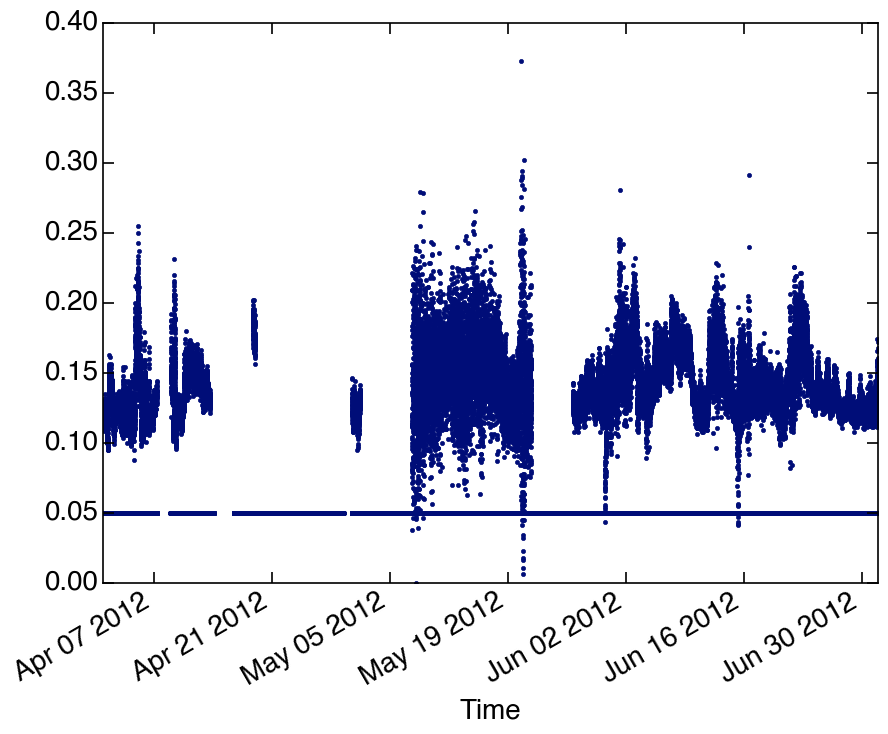

In [8]:
st.data[np.isnan(st.data)] = 0.05
st.plot(marker = '.', linestyle = '')

In [158]:
st_orig = st.copy()

In [179]:
def close_gaps(st):
    st = st.copy()
    st.data = st.data.sort_index()
    data = st.data.index.values
    index = st.data.index

    index_df = pd.DataFrame(index = index)

    period = 60
    dt = data[1:] - data[:-1]
    dt = dt / np.timedelta64(1,'s')

    median = np.median(dt)

    if median > (1.1 * periode) or median < (0.9 * periode):
        raise ValueError('periode and median missmatch (%0.1f,%0.1f)'%(median,periode))

    for i, op in enumerate(off_periods):
        no_periods = round((op[1] - op[0])/ np.timedelta64(period,'s'))
        out = pd.date_range(start = op[0], periods= no_periods, freq= '%s s'%period)
        out = out[1:]
        out = pd.DataFrame(index = out)
        index_df = pd.concat([index_df, out])

    index_df.sort_index(inplace=True)
    st.data = st.data.reindex(index_df.index)
    return st

In [180]:
bla = close_gaps(st)

<IPython.core.display.Javascript object>


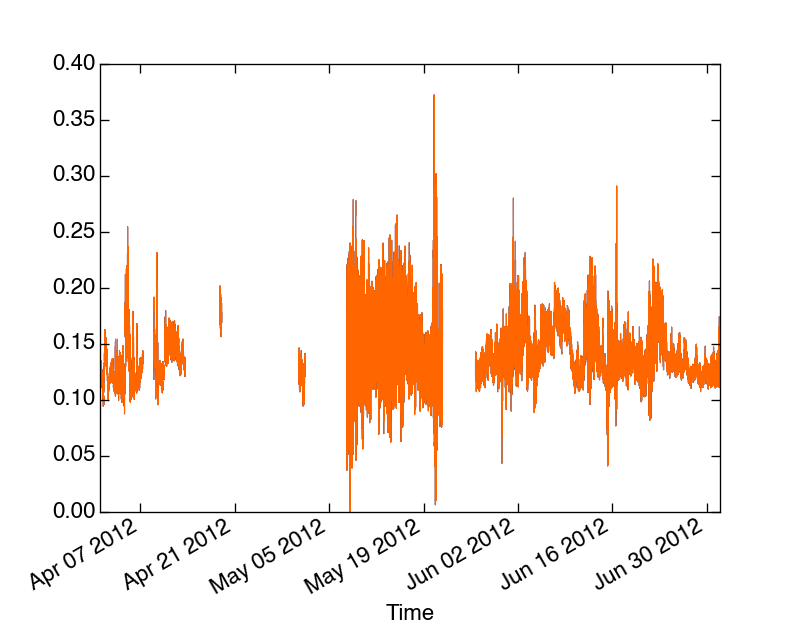

In [181]:
a = bla.plot()
st_orig.plot(ax = a)

In [177]:
%matplotlib nbagg

array([ 61.,  60.,  60., ...,  61.,  59.,  61.])

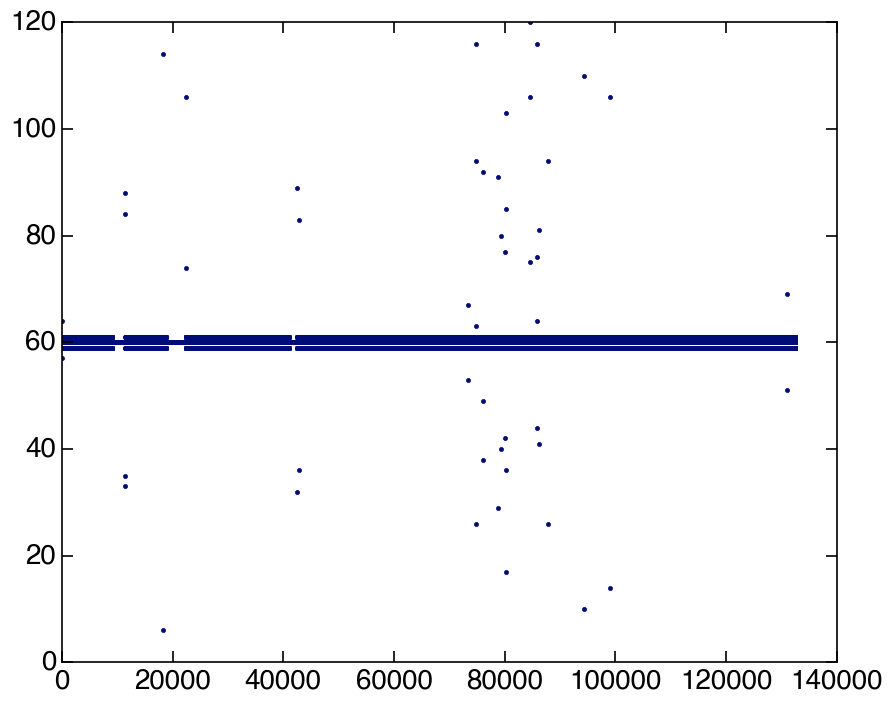

In [162]:
plt.plot(bla, '.')

In [147]:
%matplotlib inline

In [146]:
plt.plot(dt,'.')

In [187]:
point_dist = (index.values[1:] - index.values[:-1])/ np.timedelta64(1, 's')
where = point_dist > 2 * period
off_periods = np.array([index[:-1][where], index[1:][where]]).transpose()

In [182]:
off_periods

array([['2012-04-07T02:14:01.000000000-0600',
        '2012-04-08T17:13:36.000000000-0600'],
       ['2012-04-13T20:12:00.000000000-0600',
        '2012-04-16T06:54:14.000000000-0600'],
       ['2012-04-29T06:13:00.000000000-0600',
        '2012-04-30T06:42:32.000000000-0600'],
       ['2012-04-30T17:59:01.000000000-0600',
        '2012-04-30T18:02:00.000000000-0600'],
       ['2012-05-21T13:41:00.000000000-0600',
        '2012-05-21T15:32:00.000000000-0600'],
       ['2012-05-22T16:59:00.000000000-0600',
        '2012-05-22T17:14:03.000000000-0600'],
       ['2012-05-25T12:02:00.000000000-0600',
        '2012-05-25T19:41:40.000000000-0600'],
       ['2012-05-30T07:46:00.000000000-0600',
        '2012-05-30T07:49:04.000000000-0600'],
       ['2012-05-31T17:59:01.000000000-0600',
        '2012-05-31T18:02:00.000000000-0600']], dtype='datetime64[ns]')

In [109]:
i = 0
print(off_periods[i,0] + np.timedelta64(6, 'h'))
print(off_periods[i,1] + np.timedelta64(6, 'h'))
no_periods = round((off_periods[i,1] - off_periods[i,0])/ np.timedelta64(period,'s'))
out = pd.date_range(start = off_periods[i,0], periods= no_periods, freq= '%s s'%period)
out

IndexError: arrays used as indices must be of integer (or boolean) type

In [66]:
tmp = (off_periods[1] - off_periods[0])
tmp / np.timedelta64(60, 's')

array([  2.33958333e+03,   3.52223333e+03,   1.46953333e+03,
         2.98333333e+00,   1.11000000e+02,   1.50500000e+01,
         4.59666667e+02,   3.06666667e+00,   2.98333333e+00])

# Load/save

## netCDF

In [7]:
fname = '/Users/htelg/data/20160108_ARM_test/all/sgpnoaaaosC1.b1.20120101.000000.cdf'
aos = read_data.read_cdf(fname)

fname = '/Users/htelg/data/20160108_ARM_test/all/sgptdmaapssizeC1.c1.20120101.091247.cdf'
tdma = read_data.read_cdf(fname, data_quality='patchy')

tdma.size_distribution.index_of_refraction = 1.5
opt = tdma.size_distribution.calculate_optical_properties(550)

opt.extinction_coeff_sum_along_d.data *= 2.2e6

ts = timeseries.TimeSeries(pd.DataFrame(aos.scatt_coeff.data.Bs_B_Dry_10um_Neph3W_1))
ts._data_period = aos.scatt_coeff._data_period

other = opt.extinction_coeff_sum_along_d

tsrm_al = ts.align_to(other)


 /Users/htelg/data/20160108_ARM_test/all/sgpnoaaaosC1.b1.20120101.000000.cdf

 /Users/htelg/data/20160108_ARM_test/all/sgptdmaapssizeC1.c1.20120101.091247.cdf


In [11]:
fname = '/Users/htelg/tmp/text.nc'
ts.save_netCDF(fname)

/Users/htelg/prog/atm-py


In [9]:
ts_out = timeseries.load_netCDF(fname)

## csv

Usually a TimeSeries is generated when data representing a timeseries is loaded, e.g. POPS housekeeping data, or piccolo telemetry data.

In [2]:
pops_hk = housekeeping.read_csv('./data/POPS_housekeeping.csv')
picco_tel = piccolo.read_csv('./data/piccolo.log')

NameError: name 'housekeeping' is not defined

# Features

## merge TimeSeries instances with different time axes

This attribute of a TimeSeries class allows the projection of a different instance on the current one. The resulting instance will have the collumns of both instances but with the time axes according to the first instance.

In [3]:
pops_hk_merged = pops_hk.merge(picco_tel)
# pops_hk_merged.data

After merging it is possible to plot for example the Particle rate as a function of altitude. Columns which where previously in different Timeseries with different time intervals and time values.

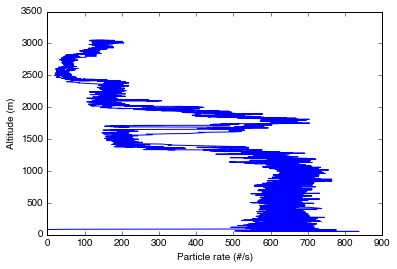

In [4]:
f,ax = plt.subplots()
ax.plot(pops_hk_merged.data.Particle_rate_nops, pops_hk_merged.data.Altitude)
ax.set_ylabel('Altitude (m)')
ax.set_xlabel('Particle rate (#/s)')

## Plot on map (probably not working right now)

When a TimeSeries instance has data columns named 'Lat' and 'Lon' it is possible to do a quick drowing of e.g. fligh path on a map. This uses matplotlib basemap.

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:1624: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif fill_color == 'none' or fill_color == 'None':


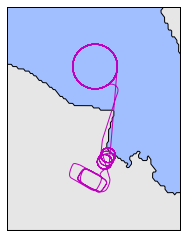

In [36]:
pops_hk_merged.plot_map(resolution = 'f')

# Perform correlations

In [3]:
out = pops_hk.correlate_to(picco_tel, data_column='Particle_rate_nops', correlant_column='Altitude')

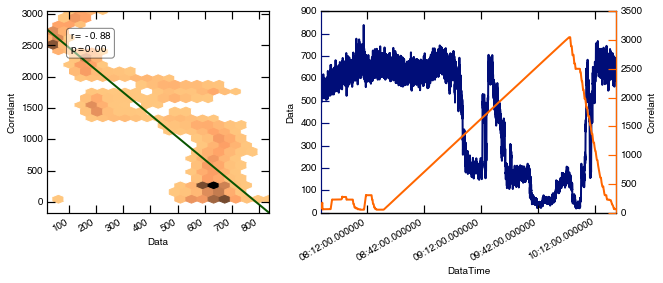

In [7]:
a,a2,a3 = out.plot_pearsonANDoriginal_data(gridsize = 20, xlim=None)

# align data 

In [ ]:
ts.align_to(...)